In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df = pd.read_csv('../databuoi2/data.csv', sep = ';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
df1 = df.copy()

In [6]:
df1['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [7]:
def encode_target_logis(x): 
    if x == 'Graduate':
        return 1
    else:
        return 0
    
df1['Target'] = df['Target'].apply(encode_target_logis)

In [8]:
def z_score(x): 
    return (x - x.mean()) / x.std()

continous_feature = ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)', 'Unemployment rate','Inflation rate','GDP']

df1[continous_feature].apply(z_score)


,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,-0.804750,0.022226,-2.196854,-1.963267,-0.287606,0.124372,0.765674
1,2.076585,1.071805,0.693520,0.659487,0.876123,-1.105097,0.347160
2,-0.804750,-0.150402,-2.196854,-1.963267,-0.287606,0.124372,0.765674
3,-0.804750,-0.509468,0.575546,0.416403,-0.813161,-1.466705,-1.375356
4,-2.472892,1.002754,0.349428,0.531548,0.876123,-1.105097,0.347160
...,...,...,...,...,...,...,...
4419,-0.577276,-0.329935,0.610938,0.467578,1.476757,1.136876,-1.789464
4420,-0.956399,-0.550899,0.280610,0.147730,-0.174987,-0.454201,0.889026
4421,1.621637,1.555164,0.881911,0.627502,0.876123,-1.105097,0.347160
4422,3.593077,1.852084,0.652229,0.339639,-0.813161,-1.466705,-1.375356


In [9]:
df1['Target']

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 4424, dtype: int64

In [10]:
df_onehot_course = pd.get_dummies(df1['Course'], prefix='Course').astype('int64')
print(df_onehot_course)
df1 = pd.concat([df1, df_onehot_course], axis=1)
df1 = df1.drop('Course', axis=1)

      Course_33  Course_171  Course_8014  Course_9003  Course_9070  \
0             0           1            0            0            0   
1             0           0            0            0            0   
2             0           0            0            0            1   
3             0           0            0            0            0   
4             0           0            1            0            0   
...         ...         ...          ...          ...          ...   
4419          0           0            0            0            0   
4420          0           0            0            0            0   
4421          0           0            0            0            0   
4422          0           0            0            0            0   
4423          0           0            0            0            0   

      Course_9085  Course_9119  Course_9130  Course_9147  Course_9238  \
0               0            0            0            0            0   
1            

In [11]:
print(df1.columns)

Index(['Marital status', 'Application mode', 'Application order',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grad

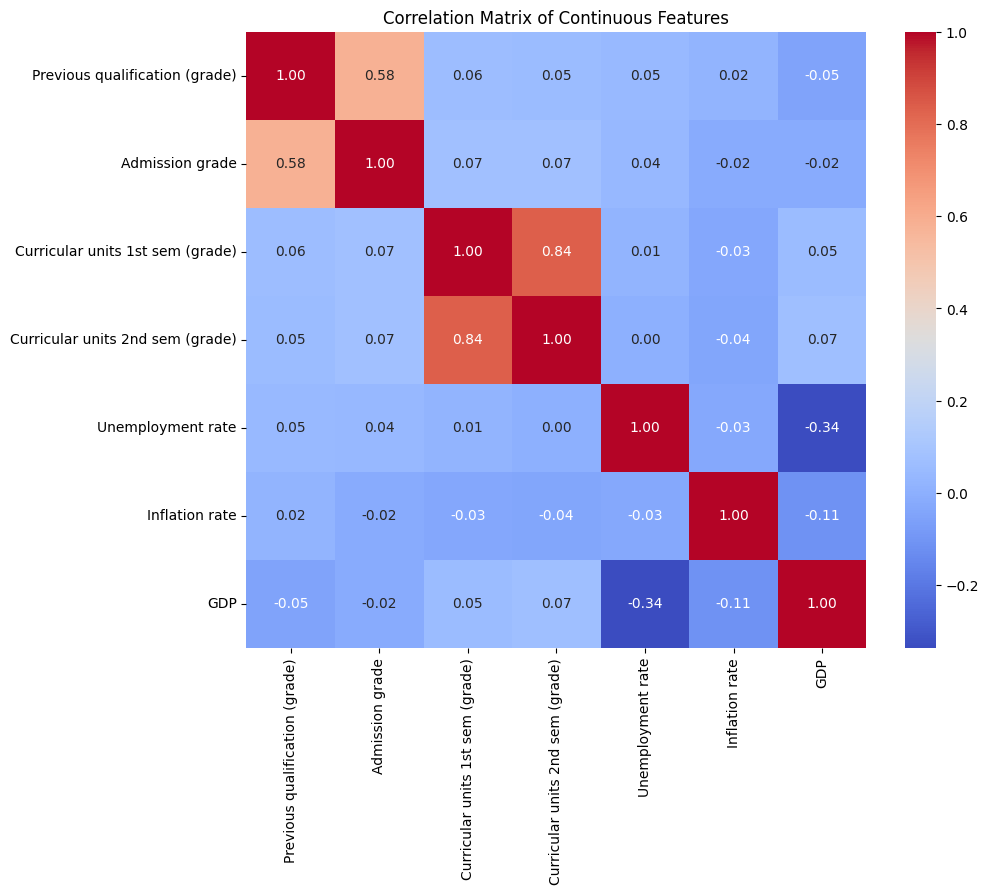

In [12]:
import seaborn as sns

import matplotlib.pyplot as plt

correlation_matrix = df1[continous_feature].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Continuous Features")
plt.show()

In [13]:
df1.drop('Curricular units 1st sem (grade)', axis=1, inplace=True)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Daytime/evening attendance	                     4424 non-null   int64  
 4   Previous qualification                          4424 non-null   int64  
 5   Previous qualification (grade)                  4424 non-null   float64
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [15]:
X = df1.iloc[:, :]
print(X.columns)

X.drop('Target', axis=1, inplace=True)


Index(['Marital status', 'Application mode', 'Application order',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (with

In [16]:
y = df1.iloc[:, 34]

In [17]:
print(y)

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 4424, dtype: int64


In [18]:
X = X.to_numpy()

In [19]:
print(X.shape)

(4424, 51)


In [20]:
y = y.to_numpy().reshape(-1,1)

In [21]:
print(y.shape)

(4424, 1)


In [22]:
from tqdm import tqdm

class LogisticRegression: 
    def __init__ (self, epoch, lr):
        self.epoch = epoch
        self.lr = lr
        self.loses = []
        self.metrics = []
    
    def sigmoid(self, z):
        
        return 1 / (1 + np.exp(-z))
    
    def loss_fn(self, y, y_hat):
        return -(y * np.log(y_hat + 1e-6) + (1 - y) * np.log(1 - y_hat + 1e-6)).mean()
    
    def accuracy(self, y, y_hat):
        return np.mean(1-np.abs(y-y_hat))
    
    def fit(self, X, y):
        n = X.shape[0]
        d = X.shape[1]
        self.theta = np.zeros((d, 1))
        with tqdm(range(self.epoch)) as pb:
            for e in pb: 
                pb.set_description(f"Epoch {e+1}/{self.epoch}")
                y_hat = self.predict(X)

                diff = y_hat - y
                gradient = 1/n * np.matmul(X.T, (diff))
                self.theta -= self.lr * gradient

                y_hat = self.predict(X)
                loss = self.loss_fn(y, y_hat)
                acc = self.accuracy(y, y_hat)
                pb.set_postfix(
                    {
                        'loss': loss,
                        'accuracy': acc
                    }
                )

                self.loses.append(loss)
                self.metrics.append(acc)
    
    def predict(self, X):
        z = np.matmul(X, self.theta)
        y_hat = self.sigmoid(z)
        return y_hat 



In [23]:
log_res = LogisticRegression(epoch=100, lr=0.05)
log_res.fit(X, y)

Epoch 2/100:   0%|          | 0/100 [00:00<?, ?it/s, loss=3.36, accuracy=0.506]C:\Users\NewDat\AppData\Local\Temp\ipykernel_17756\2706375570.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
Epoch 100/100: 100%|██████████| 100/100 [00:00<00:00, 204.77it/s, loss=6.75, accuracy=0.505]


In [24]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [25]:
df2 = df.copy()

In [26]:
def encode_target(x):
    if x == 'Enrolled':
        return (1,0,0)
    elif x == 'Graduate':
        return (0,1,0)
    else:
        return (0,0,1)

In [27]:
X = df2.iloc[:, :]

X.drop('Target', axis=1, inplace=True)
X = X.to_numpy()
print(X.shape)

(4424, 36)


In [28]:
y = df2.iloc[:, -1]

In [29]:
print(y)

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object


In [30]:
y = df2.iloc[:, -1].apply(encode_target)
y=y.to_numpy()
oh_y = np.zeros((y.shape[0], 3))
for i in range(y.shape[0]):
    oh_y[i, y[i]] = 1 

In [31]:
class SoftmaxRegression: 
    def __init__(self, epoch, lr):
        self.epoch = epoch 
        self.lr = lr 
        self.losses = []
        self.metrics = []

    def softmax(self, z): 
        return np.exp(z) / np.sum(np.exp(z), axis=0)
    
    def loss_fn(self, y, y_hat):
        return -(y * np.log(y_hat + 1e-6)).sum(axis=-1).mean()
    
    def accuracy(self, y, y_hat):
        return (1-np.abs(y-y_hat)).mean()
    
    def fit(self, X, y):
        n = X.shape[0]
        d = X.shape[1]
        n_classes = y.shape[-1]
        self.theta = np.zeros((d, n_classes))
        with tqdm(range(self.epoch)) as pb:
            for e in pb: 
                pb.set_description(f"Epoch {e+1}/{self.epoch}")
                s = self.predict(X)

                diff = s - y
                gradient = 1/n * np.matmul(X.T, (diff))
                self.theta -= self.lr * gradient

                s = self.predict(X)
                loss = self.loss_fn(y.argmax(axis = 1), s.argmax(axis = 1))
                acc = self.accuracy(y.argmax(axis = 1), s.argmax(axis = 1))
                pb.set_postfix(
                    {
                        'loss': loss,
                        'accuracy': acc
                    }
                )

                self.losses.append(loss)
                self.metrics.append(acc)

    def predict(self, X):
        z = np.matmul(X, self.theta)
        y_hat = self.softmax(z)
        return y_hat
    




In [32]:
softmax = SoftmaxRegression(epoch=100, lr=0.05)
softmax.fit(X, oh_y)

Epoch 1/100:   0%|          | 0/100 [00:00<?, ?it/s]C:\Users\NewDat\AppData\Local\Temp\ipykernel_17756\2727495351.py:9: RuntimeWarning: overflow encountered in exp
  return np.exp(z) / np.sum(np.exp(z), axis=0)
C:\Users\NewDat\AppData\Local\Temp\ipykernel_17756\2727495351.py:9: RuntimeWarning: invalid value encountered in divide
  return np.exp(z) / np.sum(np.exp(z), axis=0)
Epoch 100/100: 100%|██████████| 100/100 [00:00<00:00, 159.23it/s, loss=-0, accuracy=1]


## Don't judge me :D, em ngồi tìm code one hot encoder nhưng mà hăng quá, quên mất là chỉ có 2 nhãn thì không cần 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

df3 = df.copy()

df3['Target'] = df3['Target'].apply(encode_target_logis)
df3[continous_feature] = df3[continous_feature].apply(z_score)

encoder = OneHotEncoder(sparse_output=False)  

x_course_encoded = encoder.fit_transform(df3[['Course']])
df3 = df3.drop(columns=['Course'])
df3 = pd.concat([df3, pd.DataFrame(x_course_encoded, columns=encoder.get_feature_names_out(['Course']))], axis=1)

y_encoded = encoder.fit_transform(df3[['Target']])

df3.drop('Target', axis=1, inplace=True)
X = df3.to_numpy()
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

y_train_labels = y_train.argmax(axis=1)  
y_test_labels = y_test.argmax(axis=1)

print(y_train_labels)

model = LogisticRegression()
model.fit(X_train, y_train_labels)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
acc = accuracy_score(y_test_labels, y_pred)
print(f"Độ chính xác: {acc*100:.2f}%")


[0 0 1 ... 1 1 0]
Độ chính xác: 83.73%


c:\Users\NewDat\Miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

df4 = df.copy()

df4[continous_feature] = df4[continous_feature].apply(z_score)

encoder = OneHotEncoder(sparse_output=False)  

x_course_encoded = encoder.fit_transform(df4[['Course']])
df4 = df4.drop(columns=['Course'])
df4 = pd.concat([df4, pd.DataFrame(x_course_encoded, columns=encoder.get_feature_names_out(['Course']))], axis=1)

y_encoded = encoder.fit_transform(df4[['Target']])

df4.drop('Target', axis=1, inplace=True)

X = df4.to_numpy()
y = y_encoded


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_labels = y_train.argmax(axis=1)  
y_test_labels = y_test.argmax(axis=1)


model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train_labels)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
acc = accuracy_score(y_test_labels, y_pred)
print(f"Độ chính xác: {acc*100:.2f}%")


[0 1 2 ... 2 2 0]


c:\Users\NewDat\Miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Độ chính xác: 74.92%


c:\Users\NewDat\Miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
